<a href="https://colab.research.google.com/github/TirendazAcademy/Deep-Learning-with-TensorFlow/blob/main/TensorFlow-Ecosystem/TFDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Dataset Library (TFDS)

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

Let's look at the list of datasets.

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

# Loading the dataset with TFDS

Let's install the fashion mnist dataset with TFDS.

In [3]:
mnist_data = tfds.load("fashion_mnist")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.PYJPK5_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.PYJPK5_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


Let's inspect the data.

In [4]:
for item in mnist_data:
  print(item)

train
test


In [5]:
mnist_train = tfds.load("fashion_mnist", split="train")

The load method return a tf.data.Dataset object. Let's check out.

In [6]:
isinstance(mnist_train, tf.data.Dataset)

True

In [7]:
mnist_train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

Let's use the take method to get a record.

In [8]:
for item in mnist_train.take(1):
  print(type(item))
  print(item.keys())

<class 'dict'>
dict_keys(['image', 'label'])


In [9]:
for item in mnist_train.take(1):
  print(item["image"].shape)
  print(item["label"].shape)

(28, 28, 1)
()


Let's see the meta data.

In [10]:
mnist_test, info = tfds.load("fashion_mnist",with_info=True)

In [11]:
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr

Let's load a dataset with Keras.

In [12]:
mnist=tf.keras.datasets.fashion_mnist

In [13]:
(training_images, training_labels),(test_images,test_labels)=mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's load the dataset with TFDS.

In [14]:
ds = tfds.load("fashion_mnist", split="train",
               as_supervised=True)

In [15]:
ds = ds.take(1)
for image, label in tfds.as_numpy(ds):
  print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 2


TFDS => (28,28,1)
Keras => (28,28)
input_shape=(28,28,1)

Converting tf.data.Dataset into Numpy array.

In [16]:
image , label = tfds.as_numpy(
    tfds.load(
        "fashion_mnist",
        split= "test",
        batch_size = -1,
        as_supervised=True
    )
)

In [17]:
print(type(image), image.shape)

<class 'numpy.ndarray'> (10000, 28, 28, 1)


# Visualization

In [18]:
ds, info = tfds.load("fashion_mnist", split="train", with_info=True)

In [ ]:
tfds.as_dataframe(ds.take(4),info)

,image,label
0,,2 (Pullover)
1,,1 (Trouser)
2,,8 (Bag)
3,,4 (Coat)


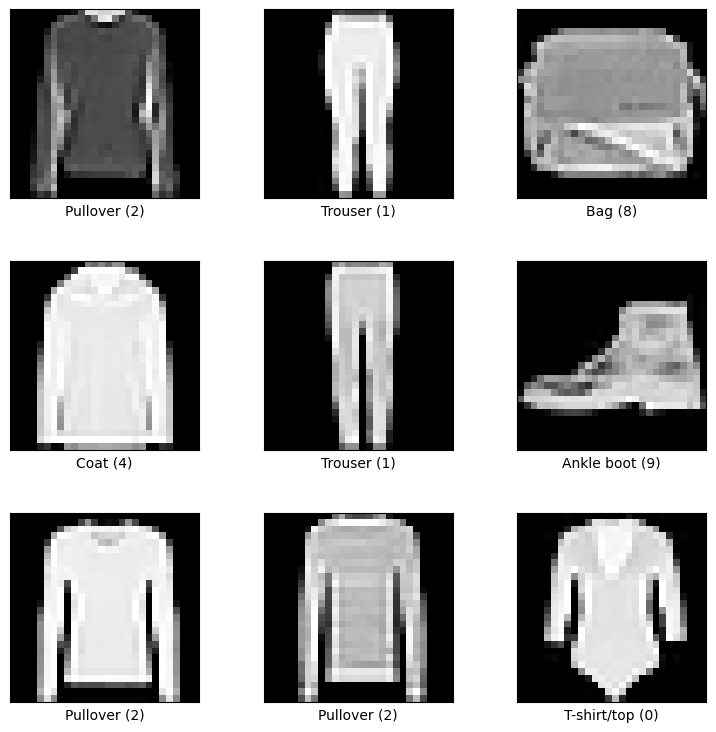

In [19]:
fig= tfds.show_examples(ds, info)

# Splitting the dataset

In [20]:
data = tfds.load("cats_vs_dogs", as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.T5E5GA_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [21]:
for item in data:
  print(item)

train


In [22]:
data = tfds.load("cats_vs_dogs", split="train[:10000]", as_supervised=True)

In [23]:
train_data = tfds.load("cats_vs_dogs",
                       split="train[:80%]", as_supervised=True)
val_data = tfds.load("cats_vs_dogs",
                       split="train[80%:90%]", as_supervised=True)
test_data = tfds.load("cats_vs_dogs",
                       split="train[-10%:]", as_supervised=True)

Thanks for reading.

Let's connect 🔗 [YouTube](https://www.youtube.com/c/TirendazAcademy) | [Medium](https://tirendazacademy.medium.com) | [Twitter](https://twitter.com/evrenozkip) | [Instagram](https://www.instagram.com/tirendazacademy) | [LinkedIn](https://www.linkedin.com/in/tirendaz-academy)